<a href="https://colab.research.google.com/github/emm-gl/NavegacionAutonoma/blob/main/ProyectoFinal/Proyecto_Final_Road3_Equipo20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final ##

MNA - Inteligencia Artificial Aplicada

MR4010 - Navegación autónoma

Dr. David Antonio Torres

Tutor: Dr. Emanuel Torres Ríos

Integrantes:
- Josias Ruiz P.
- Mauricio X. Muñoz E.
- Luis Navarrete B.
- Emmanuel González Calitl


1. Descarga el simulador de Audacity del siguiente enlace  Links to an external site. e instálalo en tu PC.
2. Verifica los video tutoriales y los capítulos de los libros indicados en este módulo para familiarizarte con el concepto de Behavioral Cloning.
3. Genera el dataset de imágenes grabando la conducción del vehículo en el simulador con cinco vueltas en una dirección y cinco vueltas en el sentido contrario.
4. Como parte de la generación de imágenes para el entrenamiento, es recomendable que se incluya situaciones en las cuales el vehículo sale de la pista y se regresa a ella. Esto le permitirá al vehículo mantenerse dentro de la pista cuando este maneje de manera autónoma.
5. Sube tu dataset a tu cuenta personal de Github siguiendo las instrucciones en este enlace
Links to an external site..
6. Crea un Notebook en Google Colab y accede al dataset que se subió a Github con el siguiente comando en la primera celda de código: !git clone https://... donde la liga debe coincidir con la carpeta en tu Github  que contiene las imágenes y el archivo CSV generados por el simulador.
7. Para la importación del dataset en el Notebook y la implementación de Behavioral Cloning con redes neuronales profundas, sigue las instrucciones indicadas en el capítulo del libro y en el artículo listados a continuación.

    Capítulo 10. Ranjan, S. y Senthamilarasu S.(2020). Applied Deep Learning and Computer Vision for Self-Driving Cars. Packt Publishing Ltd.

Links to an external site.https://learning.oreilly.com/library/view/applied-deep-learning/9781838646301/?sso_link=yes&sso_link_from=ITES
Links to an external site.M
Bojarski, M. et. al. (2016). End to End Learning for Self Driving Cars. Disponible en: https://arxiv.org/abs/1604.07316

    Links to an external site.

8. Toma en cuenta que sólo las imágenes tomadas por la cámara central del simulador deben ser consideradas para el entrenamiento de la red neuronal. Las imágenes de las dos cámaras laterales no deben ser incluidas en el modelo.
9. La red neuronal recomendada para el entrenamiento es denominada Nvidia Model. Sigue las instrucciones en el capítulo indicado en el libro de texto y en el artículo para preprocesar las imágenes y mantén en mente que estas deberán tener dimensiones de 66 por 200 pixeles para ajustarse a la capa de entrada de la red neuronal.
10. Las técnicas de Augmentation Technique y balanceo de datos es opcional para el entrenamiento.
11. Una vez concluido el entrenamiento, exporta tu modelo, haz uso del script en Python indicado en el capítulo del libro indicado y verifica tus resultados en el simulador.
12. Para fines de evidencia de los resultados logrados, asegúrate de que el vehículo autónomo complete al menos una vuelta en cada una de los pistas disponibles en el simulador. El ajuste de la velocidad de conducción es arbitrario.
13. Crea un video, con una duración menor a dos minutos, en donde expliques los parámetros de la red neuronal y del entrenamiento que permitieron llegar a una solución correcta. Asegúrate de incluir en el video la evidencia de que el vehículo autónomo completó al menos una vuelta en cada una de las dos pistas del simulador. Puede acelerar esta parte del video para lograr que esta evidencia quepa y cumpla con el requerimiento de duración del video. Sube tu video a tu canal de YouTube y guarda el enlace.
14. A manera de reporte, crea un documento que incluya tu script con los comentarios y el enlace de tu video en YouTube. Tanto el código como los comentarios son importantes para el documento.

### 0. Cargar librerias a utilizar

In [1]:
#Se cargan las bibliotecas necesarias
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
import cv2
import pandas as pd
import random
import os
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from imgaug import augmenters as iaa

np.random.seed(0)

Clone GitHub Repository

In [2]:
!git clone https://JosiasRuiz@github.com/emm-gl/NavegacionAutonoma.git

Cloning into 'NavegacionAutonoma'...
remote: Enumerating objects: 121166, done.
remote: Total 121166 (delta 0), reused 0 (delta 0), pack-reused 121166
Receiving objects: 100% (121166/121166), 1.22 GiB | 25.70 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (80806/80806), done.


### 1. Lectura de CSV

In [164]:
datadir = 'NavegacionAutonoma/ProyectoFinal/Dataset/Road3'

columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']

data = pd.read_csv(os.path.join(datadir, 'driving_log3.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)

data.head()

<ipython-input-164-87c8721b67c8>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


center  \
0  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\center_2023_06_23_17_33_48_266.jpg   
1  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\center_2023_06_23_17_33_48_332.jpg   
2  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\center_2023_06_23_17_33_48_401.jpg   
3  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\center_2023_06_23_17_33_48_470.jpg   
4  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\center_2023_06_23_17_33_48_538.jpg   

                                                                                                left  \
0  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\left_2023_06_23_17_33_48_266.jpg   
1  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\left_2023_06_23_17_33_48_332.jpg   
2  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\left_2023_06_23_17_33_48_401.jpg   
3  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\left_2023_06_23_17_33_48_470.jpg   
4  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\left_2023_06_23_17_33_48_538.jpg   

                                                                                                right  \
0  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\right_2023_06_23_17_33_48_266.jpg   
1  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\right_2023_06_23_17_33_48_332.jpg   
2  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\right_2023_06_23_17_33_48_401.jpg   
3  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\right_2023_06_23_17_33_48_470.jpg   
4  D:\Users\Josias\Downloads\term1-simulator-windows\Train_IMG2\IMG\right_2023_06_23_17_33_48_538.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0.0      0.000171  
1  0.0       0.0       0.0      0.000177  
2  0.0       0.0       0.0      0.000209  
3  0.0       0.0       0.0      0.000280  
4  0.0       0.0       0.0      0.000280

In [165]:
def path_leaf(path):
    # : This module provides os.path functionality on Windows platforms.
    # : ntpath.split() gives the file name and folder path
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2023_06_23_17_33_48_266.jpg  left_2023_06_23_17_33_48_266.jpg   
1  center_2023_06_23_17_33_48_332.jpg  left_2023_06_23_17_33_48_332.jpg   
2  center_2023_06_23_17_33_48_401.jpg  left_2023_06_23_17_33_48_401.jpg   
3  center_2023_06_23_17_33_48_470.jpg  left_2023_06_23_17_33_48_470.jpg   
4  center_2023_06_23_17_33_48_538.jpg  left_2023_06_23_17_33_48_538.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2023_06_23_17_33_48_266.jpg  0.0       0.0       0.0      0.000171  
1  right_2023_06_23_17_33_48_332.jpg  0.0       0.0       0.0      0.000177  
2  right_2023_06_23_17_33_48_401.jpg  0.0       0.0       0.0      0.000209  
3  right_2023_06_23_17_33_48_470.jpg  0.0       0.0       0.0      0.000280  
4  right_2023_06_23_17_33_48_538.jpg  0.0       0.0       0.0      0.000280

In [166]:
import subprocess
center_list_files = subprocess.check_output("ls NavegacionAutonoma/ProyectoFinal/Dataset/Road3/IMG/", shell=True).decode()
center_list_files = center_list_files.split()
center_list_files[0:5]
print("Files in path:" + str(len(center_list_files)))

Files in path:40390


In [167]:
with open(r'FilesList.txt', 'w') as fp:
    fp.write('\n'.join(center_list_files))

In [129]:
#List current images

col_list = data.center.values.tolist()
print("Total Files in csv:" + str(len(col_list)))

import subprocess
center_list_files = subprocess.check_output("ls NavegacionAutonoma/ProyectoFinal/Dataset/Road3/IMG/", shell=True).decode()
center_list_files = center_list_files.split()
center_list_files[0:5]
print("Files in path:" + str(len(center_list_files)))

#Remove missing files values
data.drop(data[~data['center'].isin(center_list_files)].index, axis = 0, inplace = True)
col_list = data.center.values.tolist()
print("Final DATA frame:" + str(len(col_list)))

Total Files in csv:40623
Files in path:40390
Final DATA frame:40390


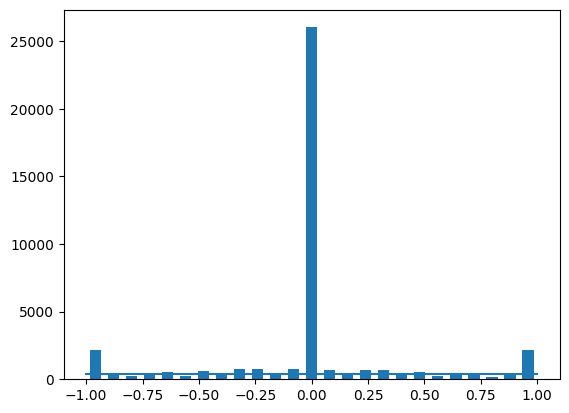

In [143]:
num_bins = 25

samples_per_bin = 400

hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))


total data: 40623
removed: 31389
remaining: 9234


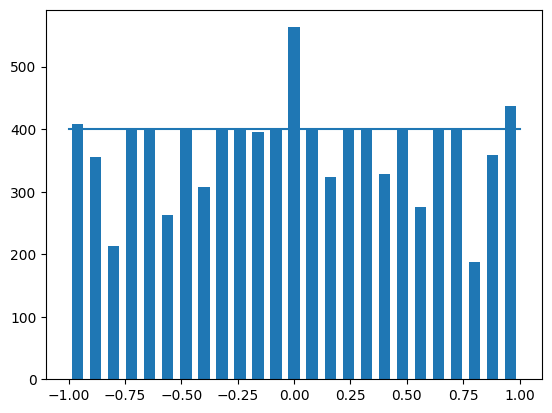

In [149]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [150]:
print(data.iloc[1])
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        # left image append
        #image_path.append(os.path.join(datadir,left.strip()))
        #steering.append(float(indexed_data[3])+0.15)
        # right image append
        #image_path.append(os.path.join(datadir,right.strip()))
        #steering.append(float(indexed_data[3])-0.15)
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2023_06_23_17_33_51_902.jpg
left        left_2023_06_23_17_33_51_902.jpg  
right       right_2023_06_23_17_33_51_902.jpg 
steering    0.0                               
throttle    0.485002                          
reverse     0.0                               
speed       29.13627                          
Name: 53, dtype: object


In [151]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 7387
Valid Samples: 1847


Text(0.5, 1.0, 'Validation set')

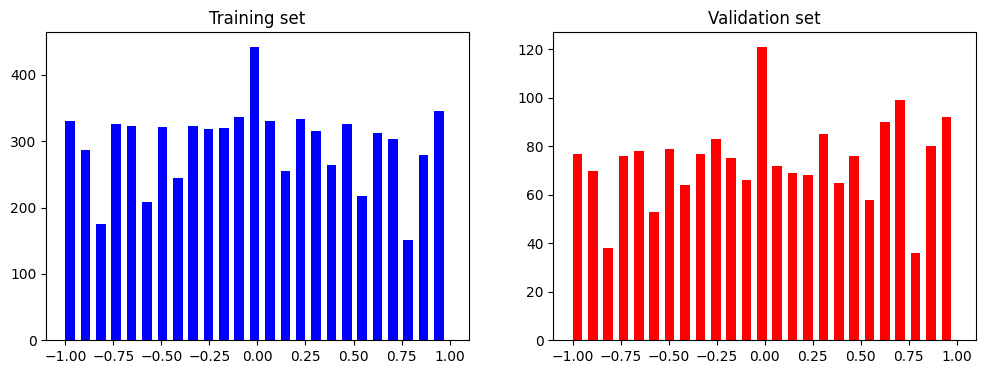

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

Text(0.5, 1.0, 'Zoomed Image')

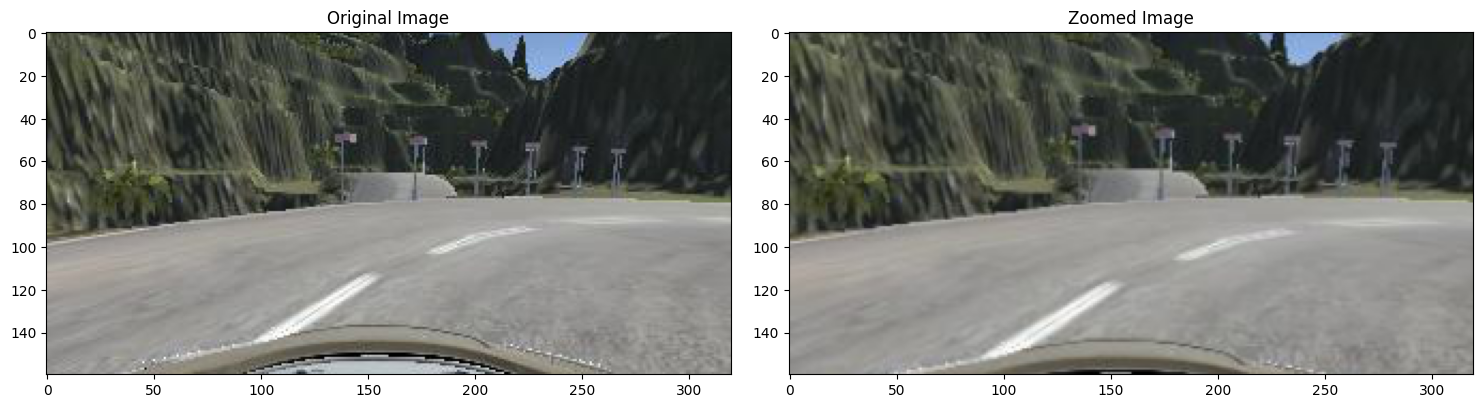

In [153]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image


image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

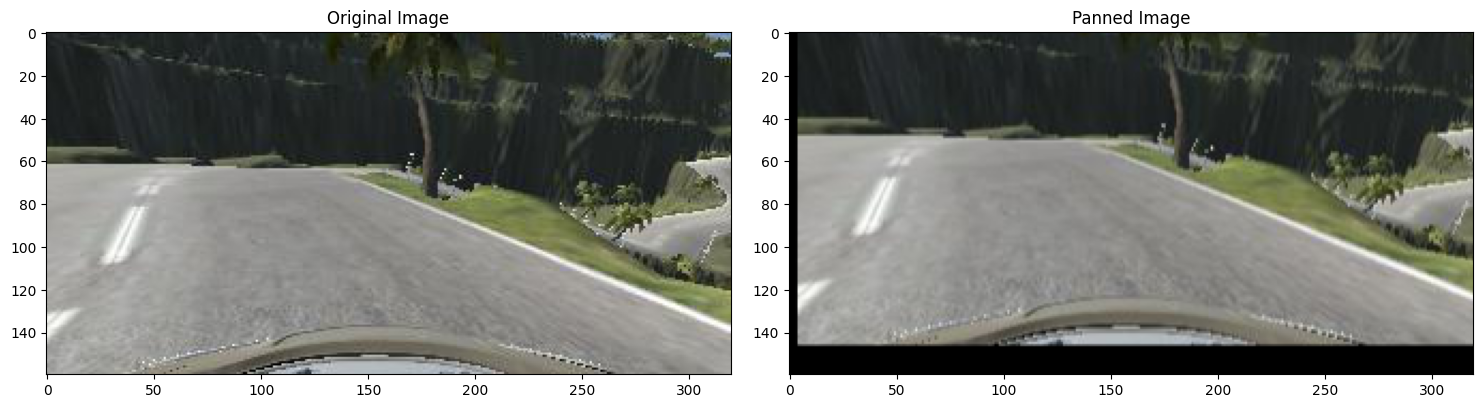

In [154]:
def pan(image):
    pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image


image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered image ')

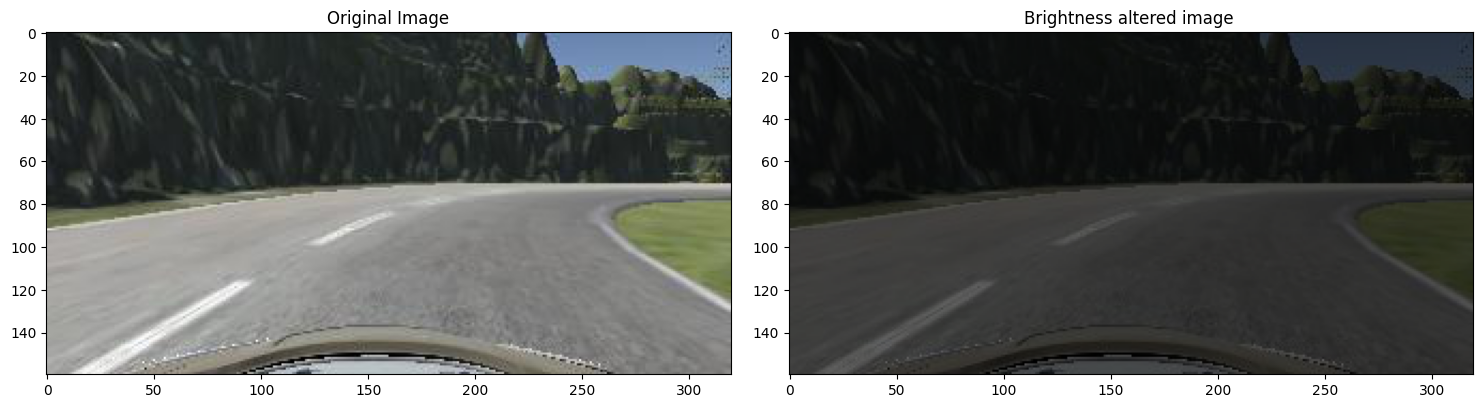

In [155]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:-0.7')

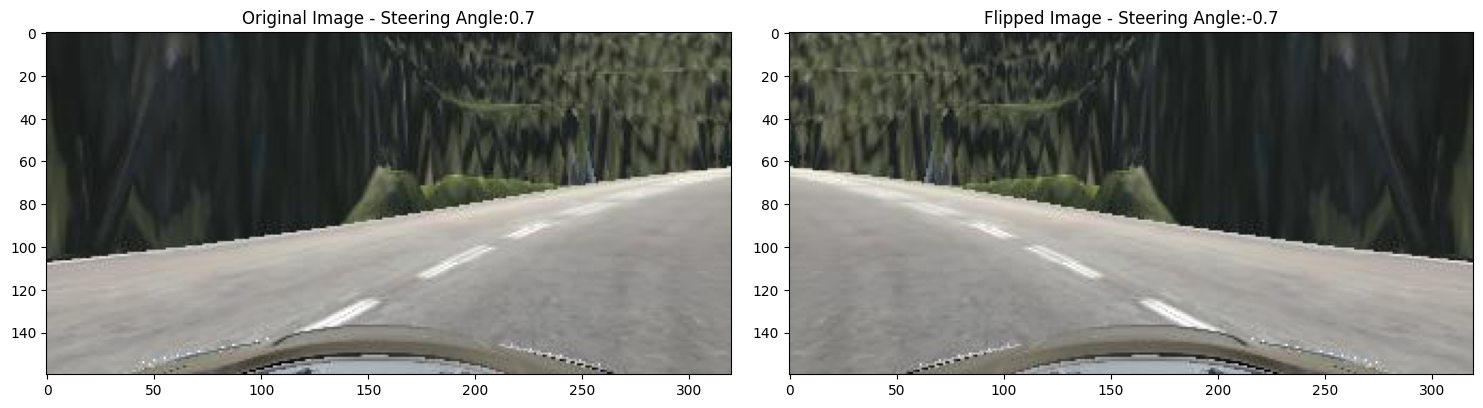

In [156]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle


random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

FileNotFoundError: ignored

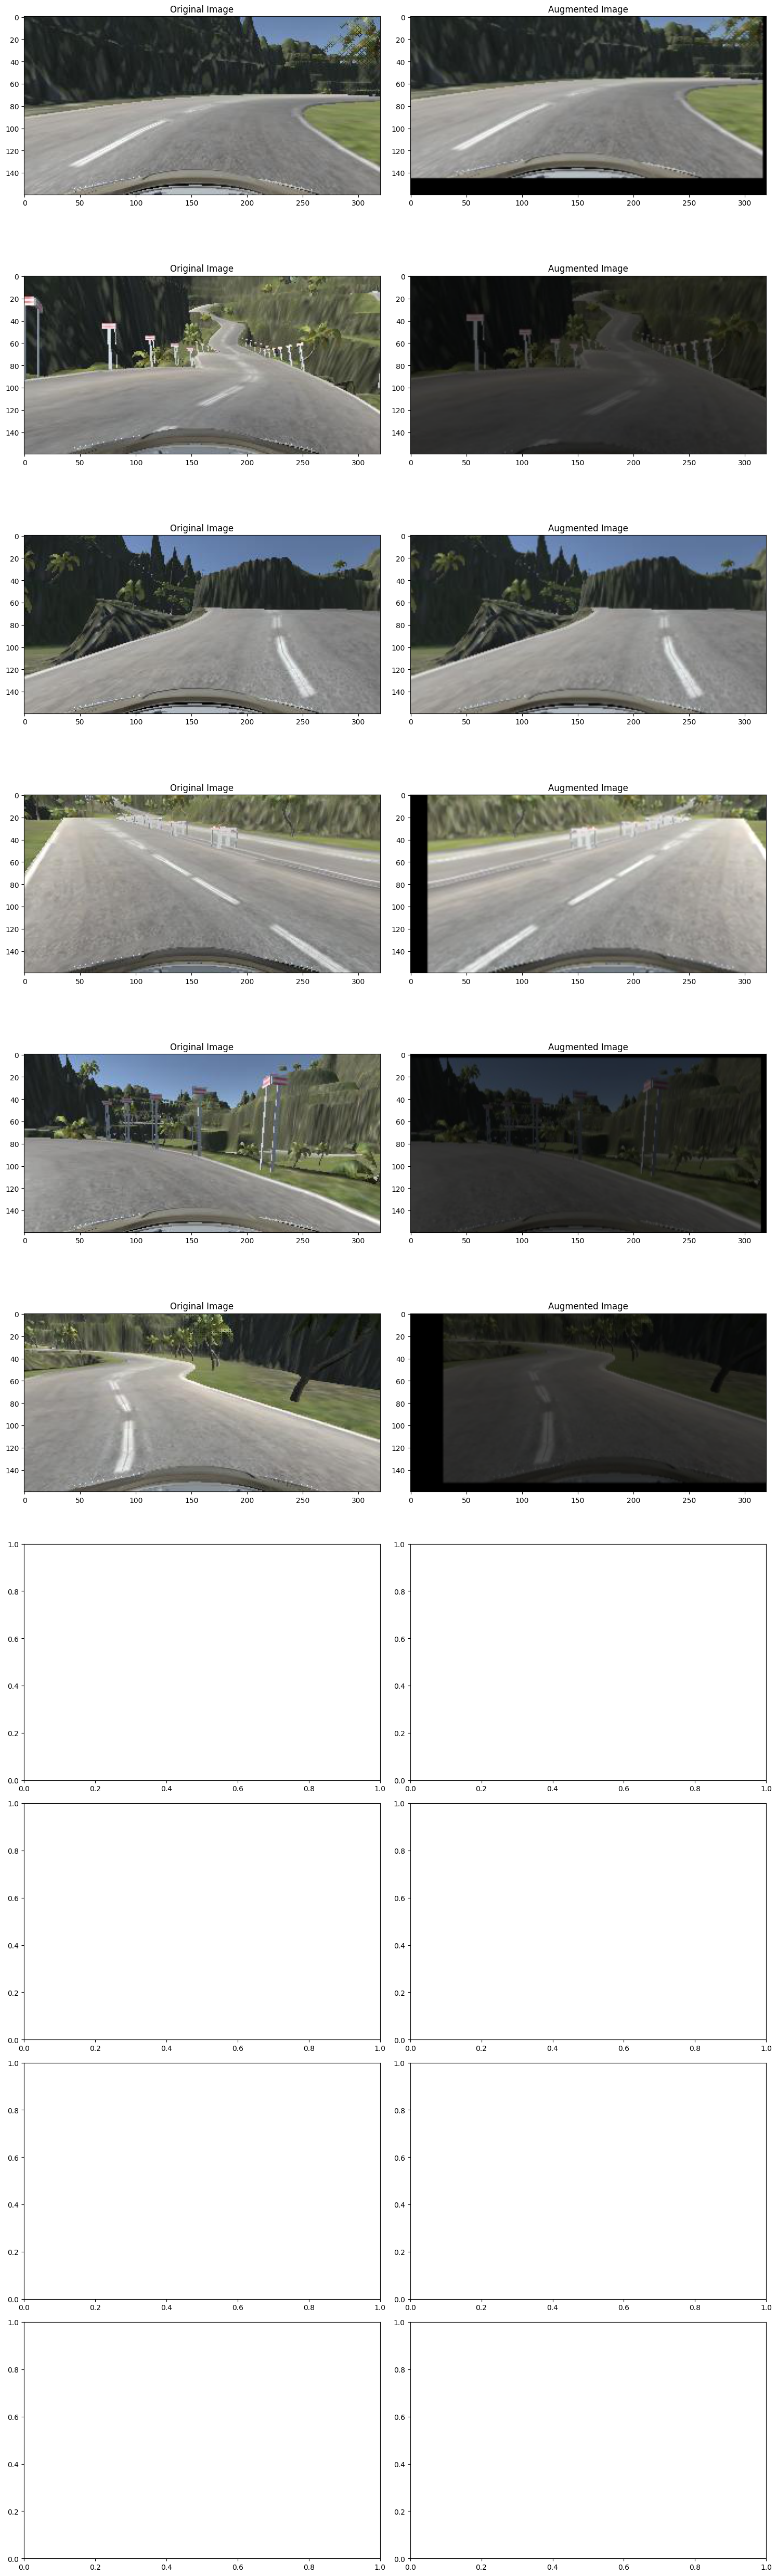

In [157]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle


ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
    randnum = random.randint(0, len(image_paths) - 1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]

    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)

    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image")

    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image")

Text(0.5, 1.0, 'Preprocessed Image')

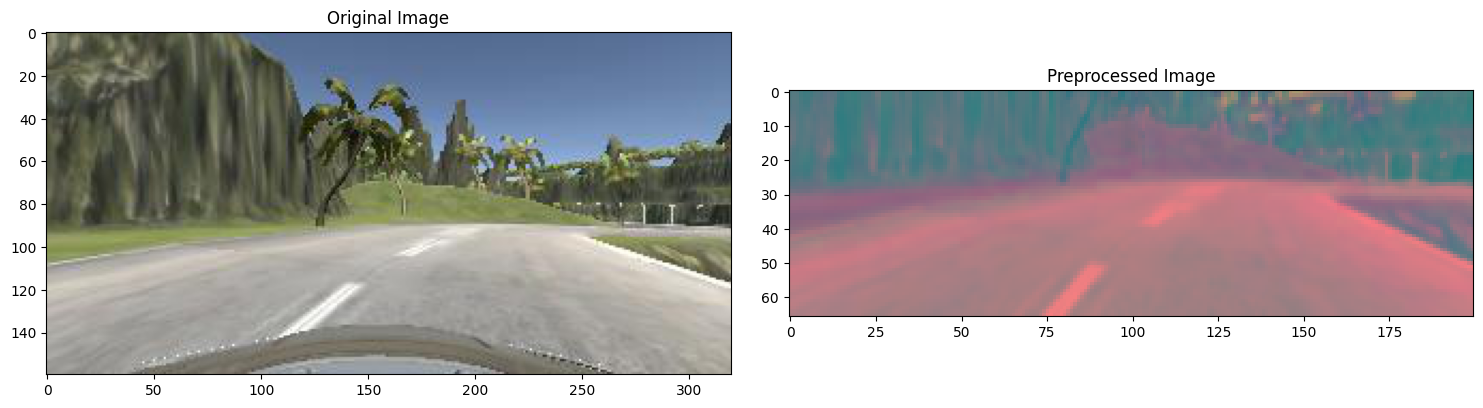

In [158]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [159]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):

            random_index = random.randint(0, len(image_paths) - 1)

            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
            else:
                im = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]

            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

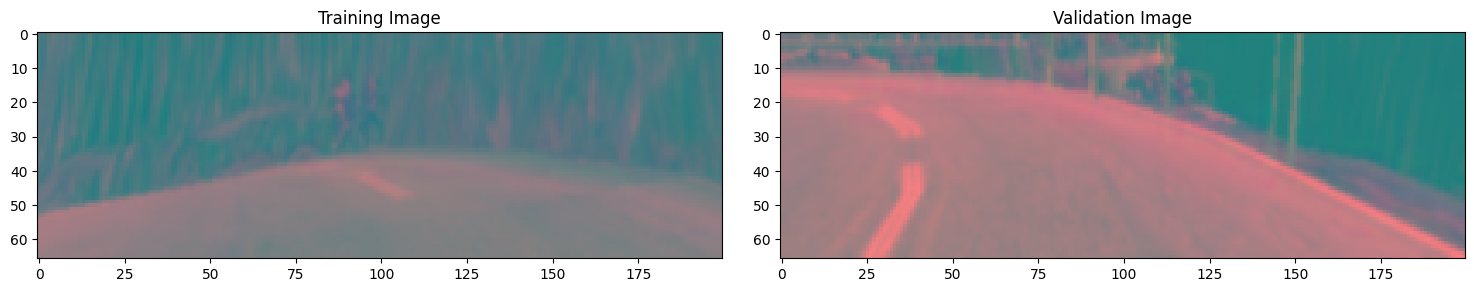

In [160]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [161]:
def nvidia_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters = 24, kernel_size = (5, 5), strides=2, input_shape=(66, 200, 3), activation='elu'))
    model.add(tf.keras.layers.Conv2D(filters = 36, kernel_size = (5, 5), strides=2, activation='elu'))
    model.add(tf.keras.layers.Conv2D(filters = 48, kernel_size = (5, 5), strides=2, activation='elu'))
    model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='elu'))

    model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='elu'))
    # model.add(tf.keras.layers.Dropout(0.5))


    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(100, activation = 'elu'))

    model.add(tf.keras.layers.Dense(50, activation = 'elu'))


    model.add(tf.keras.layers.Dense(10, activation = 'elu'))


    model.add(tf.keras.layers.Dense(1))

    optimizer = Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [162]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [163]:
history = model.fit(batch_generator(X_train, y_train, 100, 1),
                              steps_per_epoch=300,
                              epochs=10,
                              validation_data=batch_generator(X_valid, y_valid, 100, 0),
                              validation_steps=200,
                              verbose=1,
                              shuffle = 1)

FileNotFoundError: ignored

Text(0.5, 0, 'Epoch')

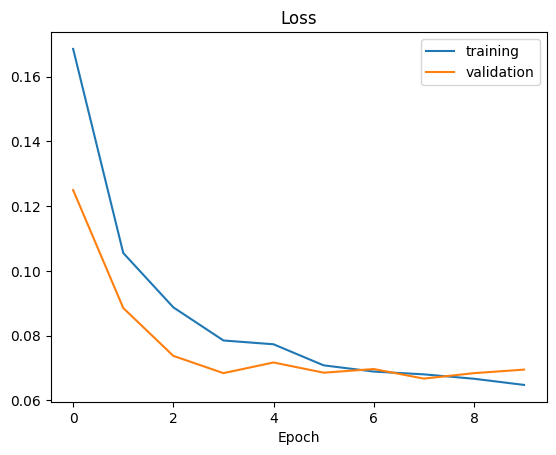

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
model.save('model.h5')